In [12]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
#from datetime import datetime, timedelta, date
#import matplotlib as mpl
import matplotlib.pyplot as plt 
#import matplotlib.patheffects as path_effects
#import matplotlib.patches as mpatches
#import matplotlib.image as mpimg
#from matplotlib import rcParams
#from matplotlib.patches import Arc
#import numpy as np
#from highlight_text import fig_text
#import seaborn as sns
#import math

In [13]:
# Scrape a league matches
base_url = 'https://understat.com/match/'
# Type the league name
league = '22431' 
url = base_url+league

In [14]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [15]:
#get only the datesData
strings = scripts[2].string
strings[0:1000]

"\n\tvar rostersData\t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x7B\\x22624623\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x22624623\\x22,\\x22goals\\x22\\x3A\\x220\\x22,\\x22own_goals\\x22\\x3A\\x220\\x22,\\x22shots\\x22\\x3A\\x220\\x22,\\x22xG\\x22\\x3A\\x220\\x22,\\x22time\\x22\\x3A\\x2290\\x22,\\x22player_id\\x22\\x3A\\x223218\\x22,\\x22team_id\\x22\\x3A\\x22264\\x22,\\x22position\\x22\\x3A\\x22GK\\x22,\\x22player\\x22\\x3A\\x22Benoit\\x20Costil\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22yellow_card\\x22\\x3A\\x220\\x22,\\x22red_card\\x22\\x3A\\x220\\x22,\\x22roster_in\\x22\\x3A\\x220\\x22,\\x22roster_out\\x22\\x3A\\x220\\x22,\\x22key_passes\\x22\\x3A\\x220\\x22,\\x22assists\\x22\\x3A\\x220\\x22,\\x22xA\\x22\\x3A\\x220\\x22,\\x22xGChain\\x22\\x3A\\x220.00921856239438057\\x22,\\x22xGBuildup\\x22\\x3A\\x220.00921856239438057\\x22,\\x22positionOrder\\x22\\x3A\\x221\\x22\\x7D,\\x22624626\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x22624626\\x22,\\x22goals\\x22\\x3A\\x220\\x22,\\x22own_goals\\x22\\x3A\\x220\\x22,\\

In [16]:
# Strip unnecessary symbols and get only JSON data 
str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON
data = json.loads(json_data)
data.keys()

dict_keys(['h', 'a'])

In [17]:
data['h']

{'624623': {'id': '624623',
  'goals': '0',
  'own_goals': '0',
  'shots': '0',
  'xG': '0',
  'time': '90',
  'player_id': '3218',
  'team_id': '264',
  'position': 'GK',
  'player': 'Benoit Costil',
  'h_a': 'h',
  'yellow_card': '0',
  'red_card': '0',
  'roster_in': '0',
  'roster_out': '0',
  'key_passes': '0',
  'assists': '0',
  'xA': '0',
  'xGChain': '0.00921856239438057',
  'xGBuildup': '0.00921856239438057',
  'positionOrder': '1'},
 '624626': {'id': '624626',
  'goals': '0',
  'own_goals': '0',
  'shots': '0',
  'xG': '0',
  'time': '49',
  'player_id': '1599',
  'team_id': '264',
  'position': 'DC',
  'player': 'Norbert Gyömbér',
  'h_a': 'h',
  'yellow_card': '1',
  'red_card': '0',
  'roster_in': '624635',
  'roster_out': '0',
  'key_passes': '0',
  'assists': '0',
  'xA': '0',
  'xGChain': '0.07563949376344681',
  'xGBuildup': '0.07563949376344681',
  'positionOrder': '3'},
 '624624': {'id': '624624',
  'goals': '0',
  'own_goals': '0',
  'shots': '1',
  'xG': '0.021964

In [18]:
# getting headers for df
for key in data['h'].keys():
    df_home = pd.json_normalize(data['h'][key]).head(n=0)

# getting the data
for key in data['h'].keys():
    df_current = pd.json_normalize(data['h'][key])
    df_home = pd.concat([df_home, df_current])

df_home

,id,goals,own_goals,shots,xG,time,player_id,team_id,position,player,h_a,yellow_card,red_card,roster_in,roster_out,key_passes,assists,xA,xGChain,xGBuildup,positionOrder
0,624623,0,0,0,0,90,3218,264,GK,Benoit Costil,h,0,0,0,0,0,0,0,0.00921856239438057,0.00921856239438057,1
0,624626,0,0,0,0,49,1599,264,DC,Norbert Gyömbér,h,1,0,624635,0,0,0,0,0.07563949376344681,0.07563949376344681,3
0,624624,0,0,1,0.021964672952890396,65,8663,264,DC,Flavius Daniliuc,h,1,0,624634,0,0,0,0,0.07142433524131775,0.04945966228842735,3
0,624625,0,0,1,0.019530480727553368,90,8245,264,DC,Lorenzo Pirola,h,0,0,624638,0,0,0,0,0,0,3
0,624627,0,0,0,0,90,9902,264,DMR,Pasquale Mazzocchi,h,0,0,0,0,2,0,0.07142433524131775,0.09948919713497162,0.07752452790737152,5
0,624628,0,0,0,0,90,7755,264,DML,Domagoj Bradaric,h,0,0,0,0,1,0,0.0387721061706543,0.12363016605377197,0.08485805988311768,6
0,624629,0,0,0,0,90,3334,264,MC,Lassana Coulibaly,h,1,0,0,0,1,0,0.01884630136191845,0.5139120817184448,0.4950657784938812,9
0,624630,0,0,1,0.00921856239438057,64,9425,264,MC,Emil Bohinen,h,0,0,624637,0,0,0,0,0.08064289391040802,0.07142433524131775,9
0,624632,1,0,4,0.5286834836006165,90,1517,264,AMC,Antonio Candreva,h,0,0,0,0,1,0,0.02307453192770481,0.5395220518112183,0,12
0,624631,1,0,4,0.7760980725288391,76,4951,264,AMC,Grigoris Kastanos,h,0,0,624636,0,4,1,0.4987543225288391,1.3145102262496948,0.07142433524131775,12


In [19]:
# getting headers for df
for key in data['a'].keys():
    df_away = pd.json_normalize(data['a'][key]).head(n=0)

# getting the data
for key in data['a'].keys():
    df_current = pd.json_normalize(data['a'][key])
    df_away = pd.concat([df_away, df_current])

df_away

,id,goals,own_goals,shots,xG,time,player_id,team_id,position,player,h_a,yellow_card,red_card,roster_in,roster_out,key_passes,assists,xA,xGChain,xGBuildup,positionOrder
0,624639,0,0,0,0,90,6982,96,GK,Ivan Provedel,a,0,0,0,0,0,0,0,0.5862062573432922,0.5862062573432922,1
0,624640,0,0,1,0.058734964579343796,65,6180,96,DR,Manuel Lazzari,a,1,0,624650,0,0,0,0,0.1309584677219391,0.07222349941730499,2
0,624641,0,0,1,0.028920261189341545,90,10577,96,DC,Mario Gila,a,0,0,0,0,0,0,0,0.1309584677219391,0.1309584677219391,3
0,624642,0,0,0,0,90,1204,96,DC,Patric,a,0,0,0,0,0,0,0,0.7598189115524292,0.7598189115524292,3
0,624643,0,0,0,0,90,6176,96,DL,Adam Marusic,a,0,0,0,0,0,0,0,0.13175104558467865,0.13175104558467865,4
0,624646,0,0,1,0.07330425828695297,90,6145,96,MC,Daichi Kamada,a,0,0,0,0,0,0,0,0.1931295245885849,0.11982525885105133,9
0,624644,0,0,2,0.06137847155332565,90,5759,96,MC,Matteo Guendouzi,a,0,0,0,0,2,0,0.10030834376811981,0.23499107360839844,0.07330425828695297,9
0,624645,0,0,0,0,84,1206,96,MC,Danilo Cataldi,a,1,0,624654,0,2,0,0.09084515273571014,0.14783187210559845,0.14783187210559845,9
0,624647,0,0,2,0.09704156965017319,72,1208,96,FWR,Felipe Anderson,a,0,0,624652,0,2,0,0.6595105528831482,0.8152870535850525,0.058734964579343796,14
0,624648,1,0,1,0.7612988352775574,72,1209,96,FW,Ciro Immobile,a,0,0,624651,0,1,0,0.030728355050086975,0.1310366988182068,0.10030834376811981,15


In [20]:
df_home[['goals', 'own_goals', 'shots', 'time', 'yellow_card', 'red_card','key_passes', 'assists']] = \
    df_home[['goals', 'own_goals', 'shots', 'time', 'yellow_card', 'red_card','key_passes', 'assists']].astype(int)

df_home[['xG', 'xA', 'xGChain', 'xGBuildup']] = df_home[['xG', 'xA', 'xGChain', 'xGBuildup']].astype(float)

In [21]:
from plottable import Table, ColumnDefinition

pd.set_option("display.max.columns", None)

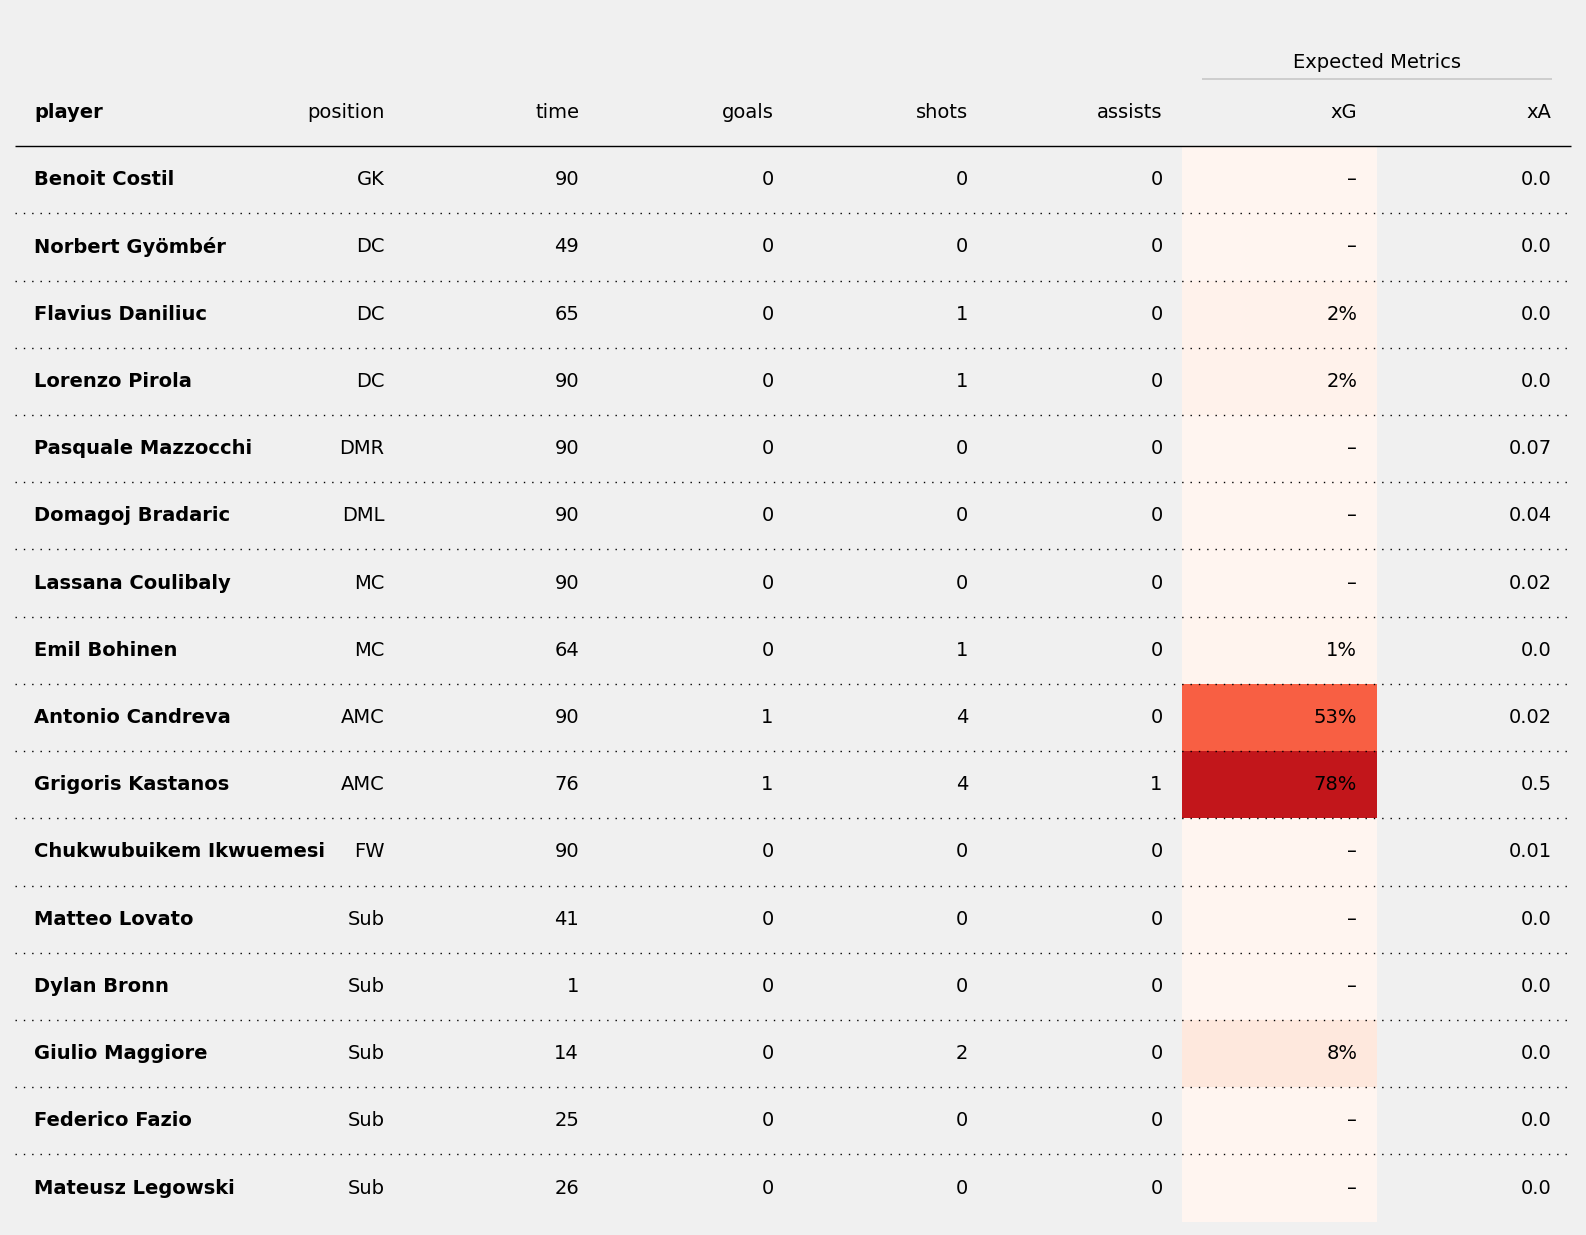

In [22]:
from plottable.formatters import decimal_to_percent

df_home_tab = df_home[['player', 'position', 'time', 'goals', 'shots', 'assists', 'xG', 'xA']]
df_home_tab = df_home_tab.set_index("player")

for i in ['xG', 'xA']:
    df_home_tab[i] = round(df_home_tab[i], 2)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(18, 15))

tab = Table(
    df_home_tab,
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
    column_definitions=[
        ColumnDefinition(name="player", textprops={"ha": "left", "weight": "bold"}),
        #ColumnDefinition(name="xG", formatter=decimal_to_percent, cmap=plt.cm.Reds),
            ColumnDefinition(name="xG", formatter=decimal_to_percent, cmap=plt.cm.Reds, group="Expected Metrics"),
            ColumnDefinition(name="xA", group="Expected Metrics")
    ]
)

plt.show()